### Car Price Prediction 

#### Import Necessary Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

#### Import the Dataset

In [40]:
data=pd.read_csv("D:/repository/car_price_prediction/Car_Price_Prediction/CarPrice_Assignment.csv")
print(data.head())
print(data.shape)

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

#### EDA

##### Check for missing value

In [41]:
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
#Drop the carID
data=data.drop(columns=["car_ID"])

#### Remove Duplicate carname

In [43]:
print(data["CarName"].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [44]:
#Keep only the first half of the word
data["CarName"]=data["CarName"].str.split(" ",expand=True)[0]
print(data["CarName"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [45]:
#We need to replace some of the typos
data["CarName"]=data["CarName"].replace({"maxda":"mazda","nissan":"Nissan","porcshce":"porsche","toyouta":"toyota",'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
print(data["CarName"].unique())
#Check for duplicate
data.duplicated().sum().sum()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


0

#### Identify all Numerical Data

In [46]:
numerical=data.select_dtypes(["number"]).columns
print("Numerical Data:",list(numerical))

Numerical Data: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


#### Identify all Categorical Data

In [47]:
categorical=data.columns.difference(numerical)
data[categorical]=data[categorical].astype("object")
print(data[categorical])
print("Categoraial Data:",list(categorical))

         CarName aspiration      carbody cylindernumber doornumber drivewheel  \
0    alfa-romero        std  convertible           four        two        rwd   
1    alfa-romero        std  convertible           four        two        rwd   
2    alfa-romero        std    hatchback            six        two        rwd   
3           audi        std        sedan           four       four        fwd   
4           audi        std        sedan           five       four        4wd   
..           ...        ...          ...            ...        ...        ...   
200        volvo        std        sedan           four       four        rwd   
201        volvo      turbo        sedan           four       four        rwd   
202        volvo        std        sedan            six       four        rwd   
203        volvo      turbo        sedan            six       four        rwd   
204        volvo      turbo        sedan           four       four        rwd   

    enginelocation enginety

### Find all the unique value in the categorical Data

In [48]:
for i in data[categorical].columns:
    print(i)
    print(data[i].unique())

CarName
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
aspiration
['std' 'turbo']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
doornumber
['two' 'four']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
fueltype
['gas' 'diesel']


In [49]:
cat=['aspiration', 'carbody', 'cylindernumber', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'fueltype']

### Data Visualization

#### Car companies distribution

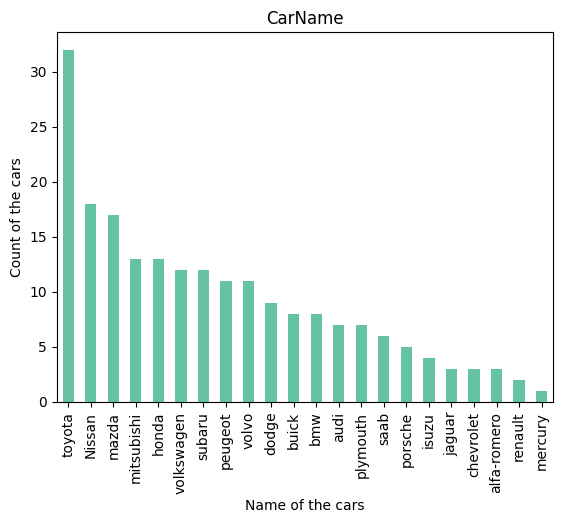

In [50]:
ax=data["CarName"].value_counts().plot(kind='bar',stacked=True,colormap='Set2')
ax.title.set_text("CarName")
plt.xlabel("Name of the cars")
plt.ylabel("Count of the cars")
plt.show()

#### Price Distribution of the cars

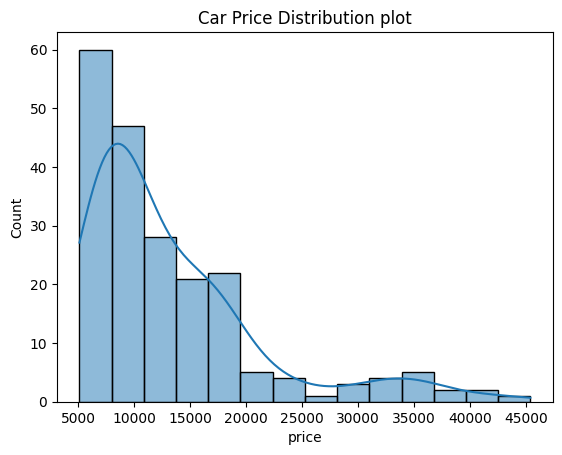

In [51]:
plt.title("Car Price Distribution plot")
sns.histplot(data['price'],kde=True)
plt.show()

#### Heat Map

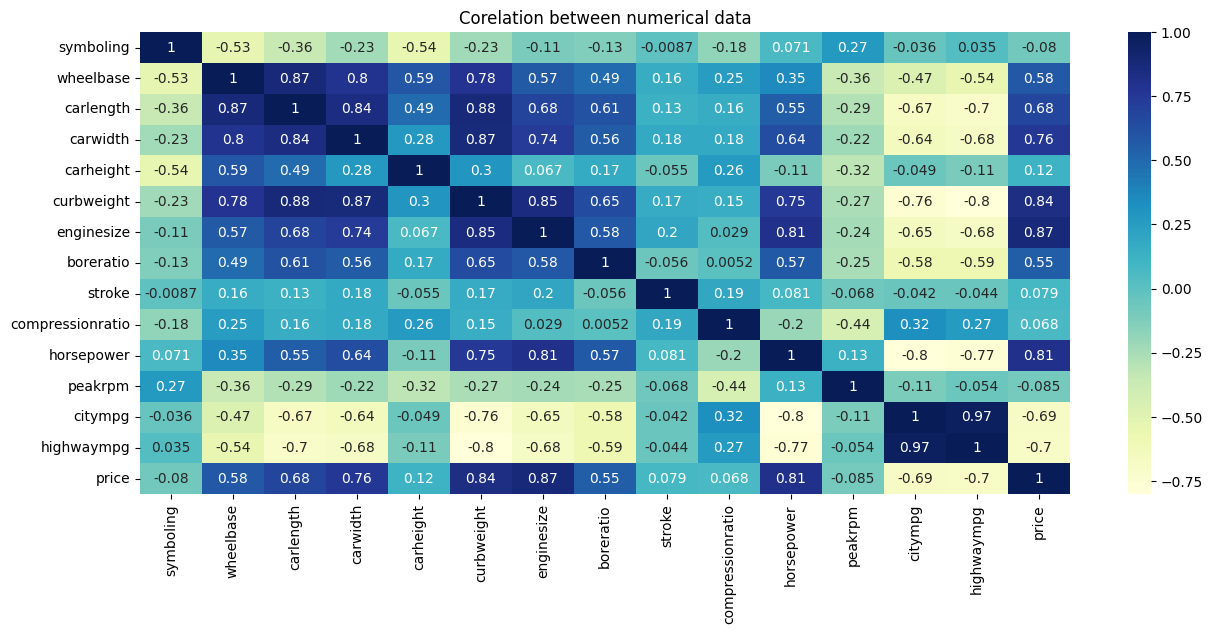

In [52]:
def heatmap(df,title):
    plt.figure(figsize=(15,6))
    #sns.set(font_scale=1)
    sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
    plt.title(title)
    plt.show()
    return

heatmap(data[numerical],"Corelation between numerical data")


#### Visualization of the numerical variable

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')


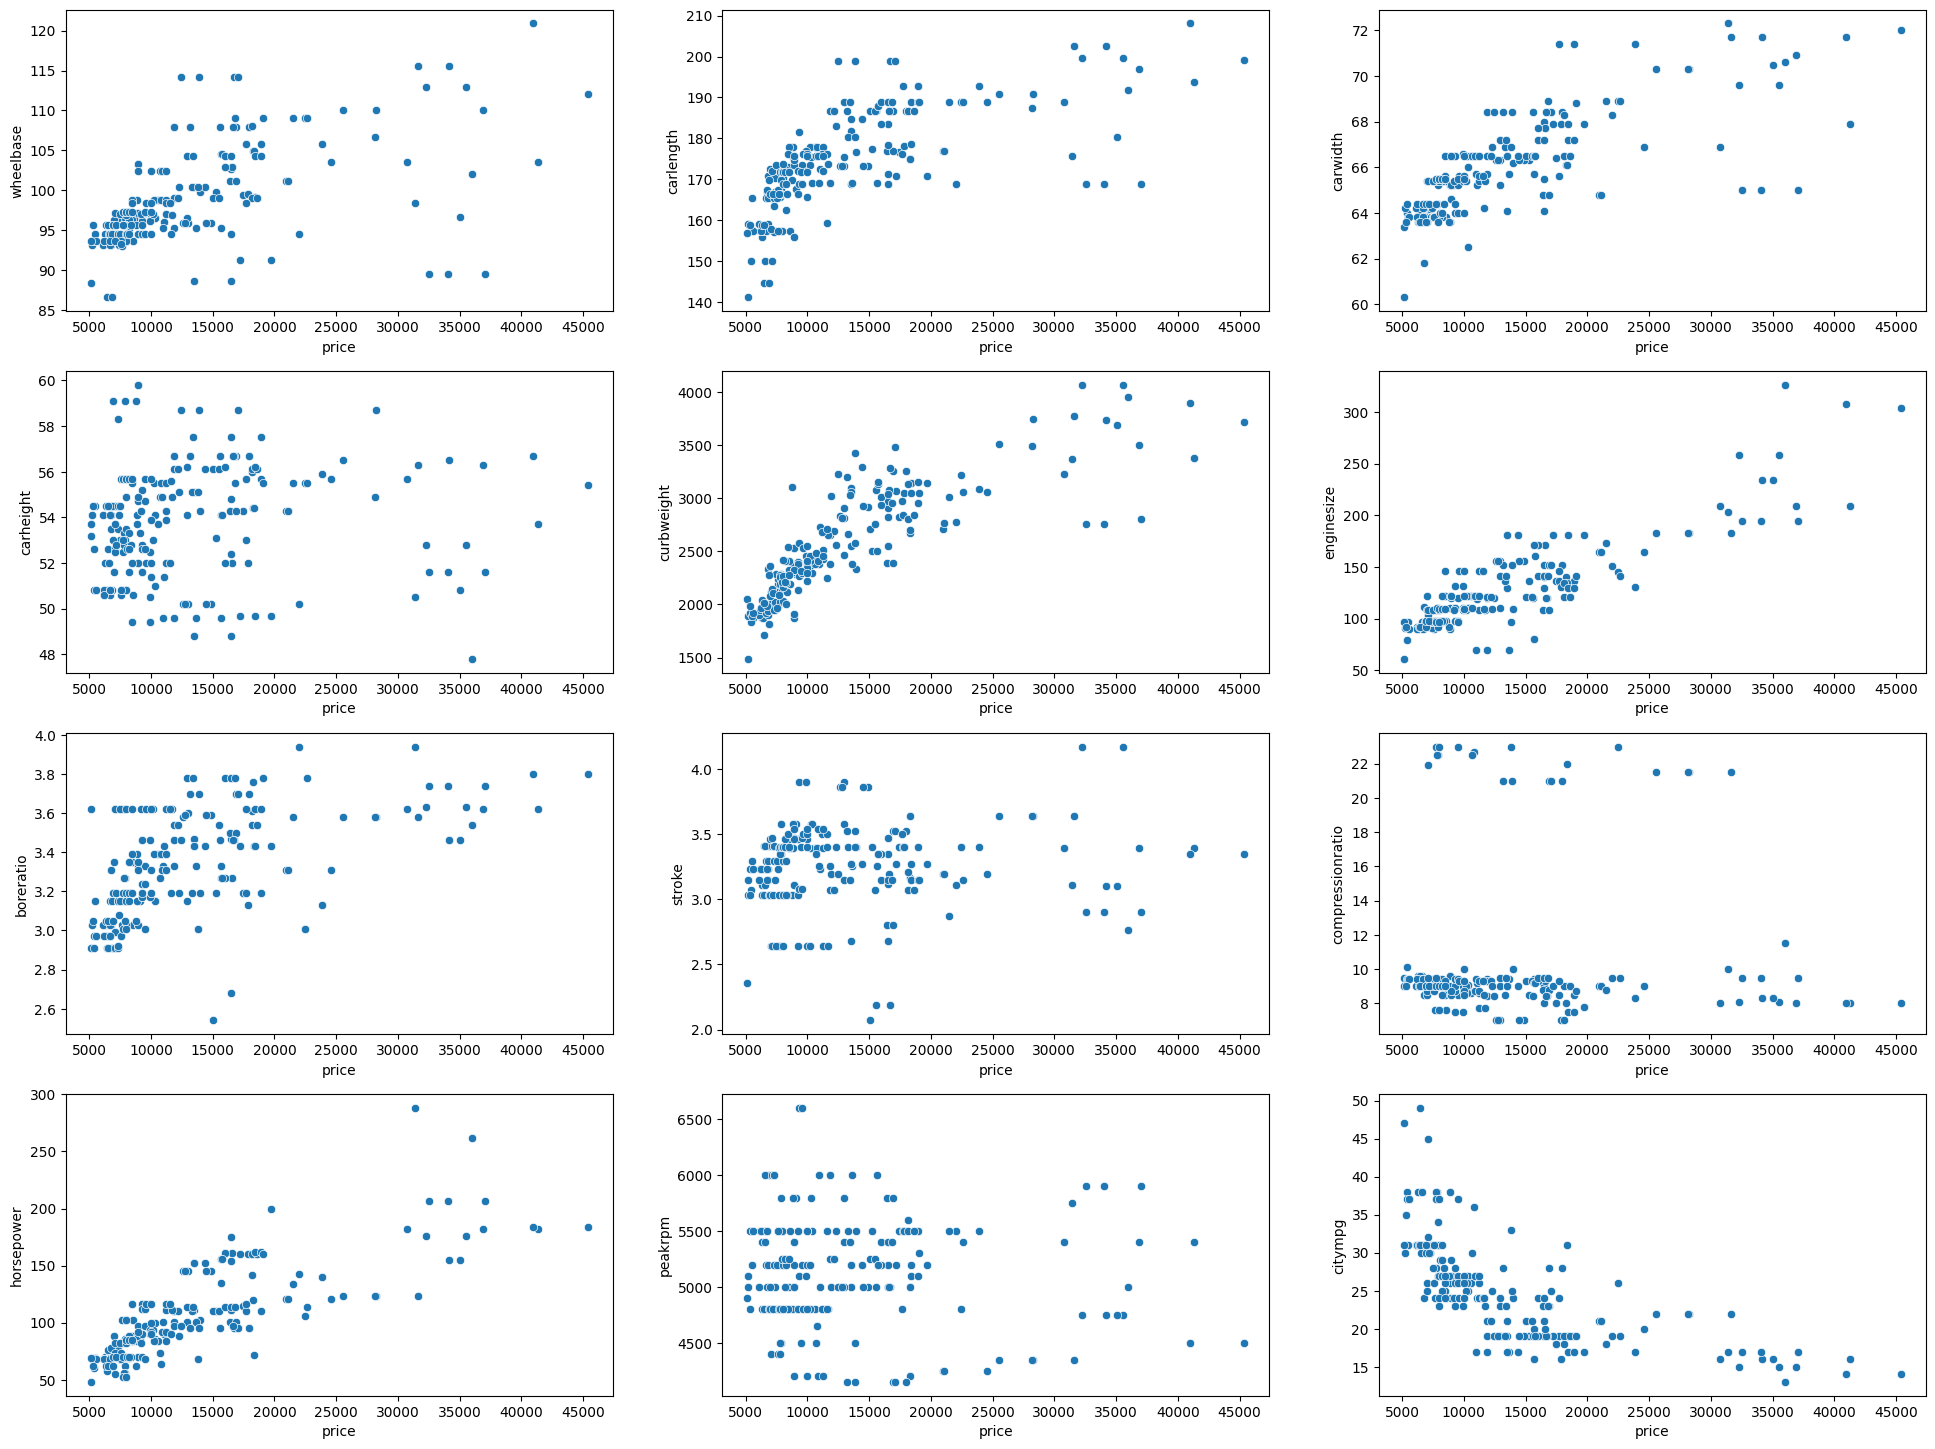

In [53]:
data[numerical]
fig,axes=plt.subplots(4,3, figsize=(24,18))
#Transform 2D axes into 1D using Flatten() making loop through the subplot easlier
axes=axes.flatten()
feature=data[numerical].columns[1:-2]
print(feature)
for i in range(len(feature)):
    sns.scatterplot(x="price",y=feature[i],data=data,ax=axes[i])


#### Visualization of categorical Variable

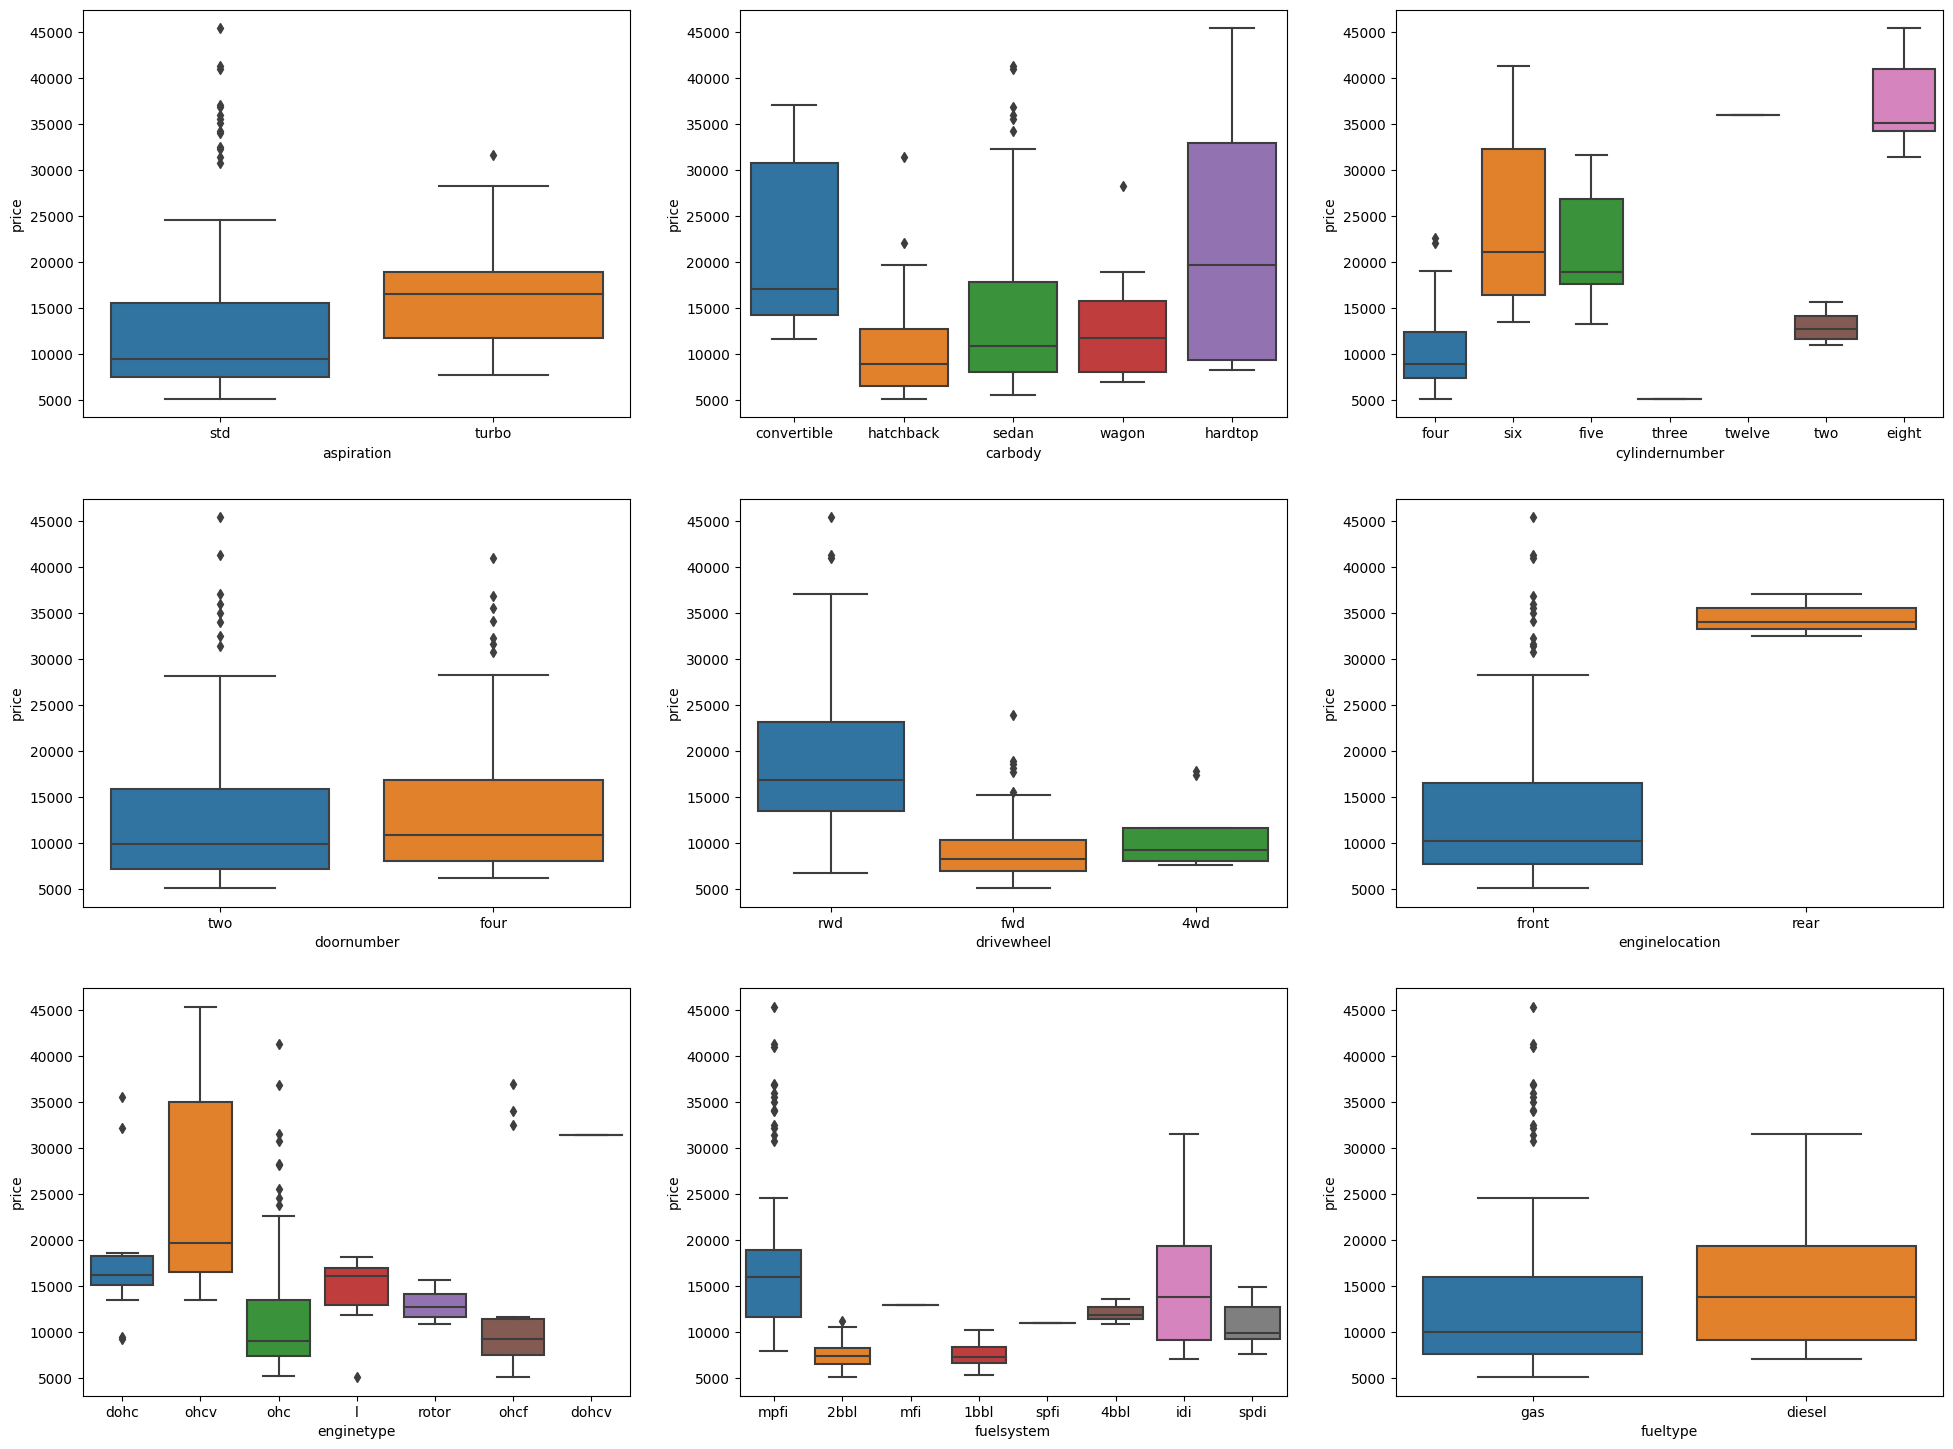

In [54]:
fig,axes=plt.subplots(3,3,figsize=(24,18))
axes=axes.flatten()
feature=data[categorical].columns[1:]
for i in range(len(feature)):
    sns.boxplot(x=feature[i],y='price',data=data,ax=axes[i])

In [18]:
"""We can understand some few things from these charts:

In fueltype diesel is slitly expensive than gas
In aspiration turbo cars are more expensive
doornumbers don't have a strong effect on price
All the types of carbody are cheaper as compared to convertible carbody
The rwd is the most expensive drivewheel
The cars with front enginelocation are way cheaper than cars with rear enginelocation.
Enginetype ohcv has the highest price.
The cylindernumber affect the price proportionaly"""

"We can understand some few things from these charts:\n\nIn fueltype diesel is slitly expensive than gas\nIn aspiration turbo cars are more expensive\ndoornumbers don't have a strong effect on price\nAll the types of carbody are cheaper as compared to convertible carbody\nThe rwd is the most expensive drivewheel\nThe cars with front enginelocation are way cheaper than cars with rear enginelocation.\nEnginetype ohcv has the highest price.\nThe cylindernumber affect the price proportionaly"

### Feature Engineering
##### So we will create priceCatagory with 3 classes :
##### *Budget_Friendly
##### *Medium Range
##### *TopNotch Cars

['Budget_Friendly' 'Medium_range' 'TopNotch_Cars']


<Axes: xlabel='priceCategory'>

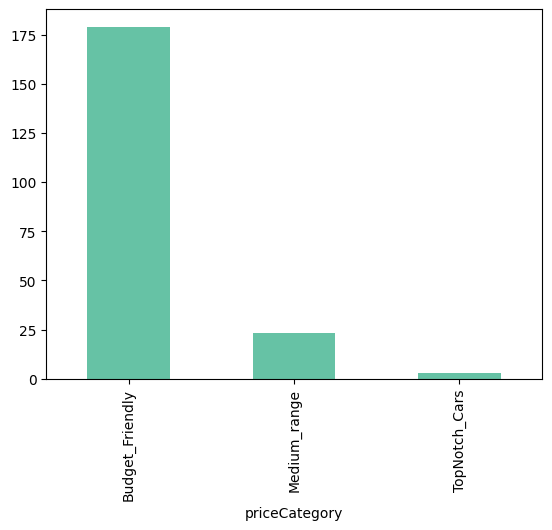

In [55]:
data["priceCategory"]=data['price'].apply(lambda price:"Budget_Friendly" if price<=20000 else
                                      "Medium_range" if price>20000 and price<=40000 else
                                      "TopNotch_Cars" if price>40000 else "invalid")
print(data["priceCategory"].unique()) 
data["priceCategory"].value_counts().plot(kind='bar',stacked=True,colormap='Set2')

### Data PreProcessing

In [56]:
data = data[['price','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
             'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 'citympg','highwaympg', 'carlength','carwidth','priceCategory']]

### Separate the idependent variable and dependent variable

In [95]:
x=data.iloc[:,1:]
y=data.iloc[:,0:1]

#### Label Encoding

In [96]:
#Perform Label encoding
le=LabelEncoder()
feature=x.select_dtypes(include=['object']).columns
for i in feature:
    x[i]=le.fit_transform(x[i])
print(x)

     enginetype  fueltype  aspiration  carbody  cylindernumber  drivewheel  \
0             0         1           0        0               2           2   
1             0         1           0        0               2           2   
2             5         1           0        2               3           2   
3             3         1           0        3               2           1   
4             3         1           0        3               1           0   
..          ...       ...         ...      ...             ...         ...   
200           3         1           0        3               2           2   
201           3         1           1        3               2           2   
202           5         1           0        3               3           2   
203           3         0           1        3               3           2   
204           3         1           1        3               2           2   

     wheelbase  curbweight  enginesize  boreratio  horsepower  

#### Normalization of the data

In [97]:
x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns, index=x.index)

### Model Building

#### Import necessary library

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [99]:
print(x.shape)
print(y.shape)
print(type(x))


(205, 16)
(205, 1)
<class 'pandas.core.frame.DataFrame'>


#### Split the data for train and test

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x))

(143, 16)
(143, 1)
(62, 16)
(62, 1)
<class 'pandas.core.frame.DataFrame'>


#### Linear Regression

In [106]:
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)
Y_pred=LR_model.predict(x_test)
print("Training Score:",LR_model.score(x_train, y_train))  # Training score is the R2 value of training
#RMSE
RMSE=np.sqrt(metrics.mean_absolute_error(y_test,Y_pred))
print("RMSE",RMSE)
#R2
R2=metrics.r2_score(y_test,Y_pred)
print("Goodness of fit:",R2)
#Adjusted R-Square
n=len(x)#Total number of data sample
k=16#Number of independent Variable
adjR2=1-((1-R2)*(n-1)/(n-k-1))
print("Adjusted R-Square:",adjR2)

Training Score: 0.9486212269754585
RMSE 43.99353800176413
Goodness of fit: 0.8483759748907194
Adjusted R-Square: 0.8354718025409933


### Random Forest Regression

In [107]:
RF_model=RandomForestRegressor()
RF_model.fit(x_train,y_train)
print("Training Score:", RF_model.score(x_train, y_train))  # Training score is the R2 value of training
Y_pred=RF_model.predict(x_test)
#RMSE
RMSE=np.sqrt(metrics.mean_absolute_error(y_test,Y_pred))
print("RMSE",RMSE)
#R2
R2=metrics.r2_score(y_test,Y_pred)
print("Goodness of fit:",R2)
#Adjusted R-Square
n=len(x)#Total number of data sample
k=16#Number of independent Variable
adjR2=1-((1-R2)*(n-1)/(n-k-1))
print("Adjusted R-Square:",adjR2)

C:\Users\plato\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Score: 0.9909524933417017
RMSE 39.05767412994353
Goodness of fit: 0.9218240627047088
Adjusted R-Square: 0.9151707914455351


### Cross Validation Method

In [109]:
from sklearn.model_selection import GridSearchCV
RF_CV_model=RandomForestRegressor()
#Dictionary of all the possible parameter to try out, to find optimal model paraters
param={'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

#GridSearchCV instance
grid_search=GridSearchCV(estimator=RF_CV_model,param_grid=param,cv=5,n_jobs=-1)

#fit the grid search to the model
grid_search.fit(x_train,y_train)

#Best parameters and score
print("Best parameters",grid_search.best_params_)
print("Best Score",grid_search.best_score_)


Best parameters {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score 0.9183101135830551


C:\Users\plato\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [112]:
RF_model=RandomForestRegressor(max_depth= None, min_samples_leaf= 2, min_samples_split=2, n_estimators=50)
RF_model.fit(x_train,y_train)
print("Training Score:", RF_model.score(x_train, y_train))  # Training score is the R2 value of training
Y_pred=RF_model.predict(x_test)
#RMSE
RMSE=np.sqrt(metrics.mean_absolute_error(y_test,Y_pred))
print("RMSE",RMSE)
#R2
R2=metrics.r2_score(y_test,Y_pred)
print("Goodness of fit:",R2)
#Adjusted R-Square
n=len(x)#Total number of data sample
k=16#Number of independent Variable
adjR2=1-((1-R2)*(n-1)/(n-k-1))
print("Adjusted R-Square:",adjR2)

"""CONCLUSION: There is no difference in the model performance after apply cross validation technique"""

Training Score: 0.9831962187864598
RMSE 39.3393619594237
Goodness of fit: 0.9238321952763465
Adjusted R-Square: 0.9173498289168867


C:\Users\plato\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
